# Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

## Importing necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import joblib
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [10]:
df=pd.read_csv('dataset/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [11]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [12]:
#Lets check the  shape of the dataset
df.shape

(30, 17)

The dataset contains 30 records and 17 features, where W(win) is the output feature

In [13]:
#checking the  information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


This tells about that Total 17 data Columns are present and 30 entries are given

In [15]:
#Lets check the  Datatypes of each column
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Here all the features are int64 and 1 column is Float datatype

## Explore the Data

Let's actually look at the data now.

### Statistical Summary

In [16]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


This tell us about the mean , median of the different columns and also the min and max values.

Also the differene between the 75% percentile and max is high in some columns that means outliers are present.

### Checking null values

In [17]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values present in the set

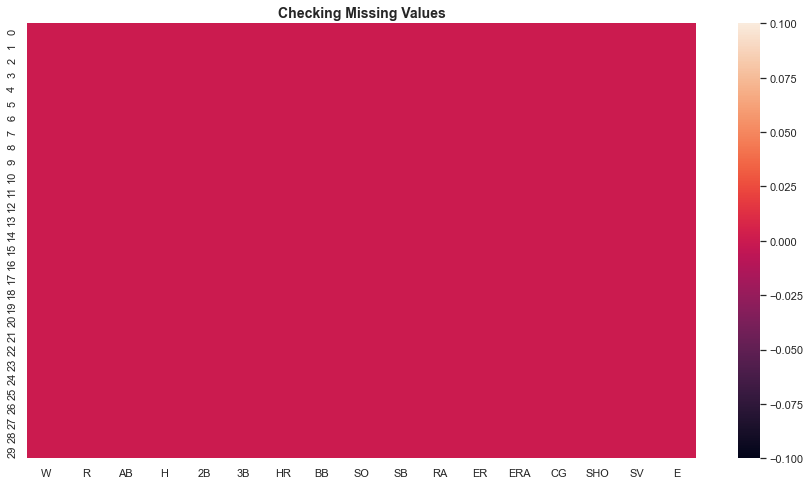

In [18]:
#Lets check this by heatmap
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.heatmap(df.isnull())
plt.title('Checking Missing Values',fontsize=14,fontweight='bold')
plt.show()

By the help of Heatmap we can also check that the null values and here no null values/Missing value are present.

### Checking the correlation

In [19]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Here it is very hard to see the correlation among columns, lets represnt this with the help of heatmap for better understanding

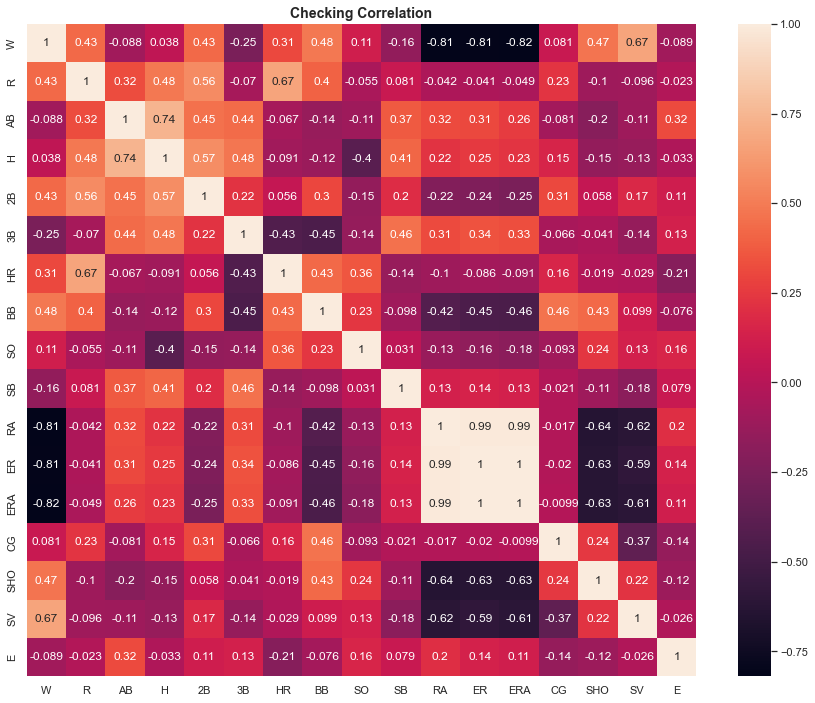

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Checking Correlation',fontsize=14,fontweight='bold')
plt.show()

Here we can see that the winning is highly correlated with the Saves as the team which saves more there is a high chance of winning. And also Runs Allowed, Earned Runs, Earned Run Average (ERA) are highly negatively correlated with the winning and These three(Runs Allowed, Earned Runs, Earned Run Average (ERA)) are also negatively correlated with the SHO(shutout), SV(saves)

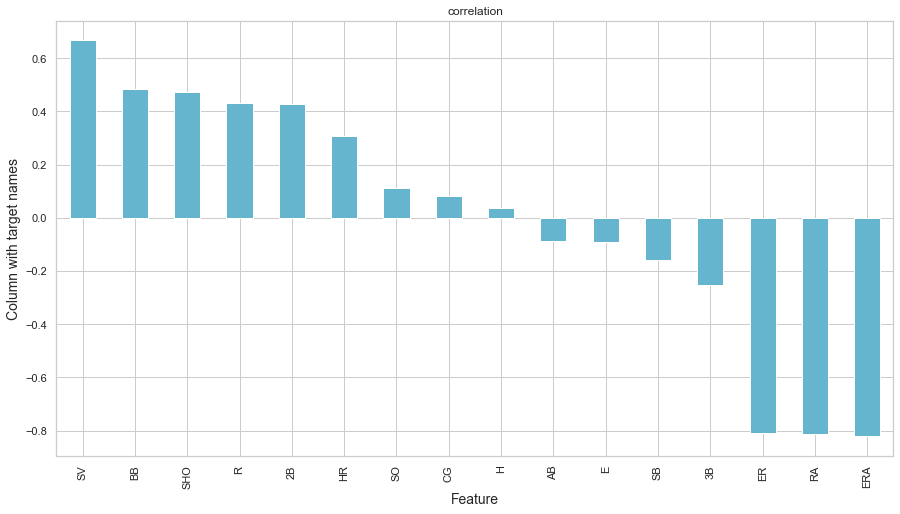

In [21]:
plt.figure(figsize=(15,8))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation')
plt.show()

#### Observation:

Here we can see that SV(Saves) and BB(Walks) have high positive corelation with winning prediction but some columns like At bat , Error, Stolen Bases, Triples have negative correlation with Win prediction, while ER(Earned Runs),,RA(Runs Allowed) and ERA(Average of Earned runs) have very highly negatively correlation with the Wining prediction for the team.

### Univariate Analysis

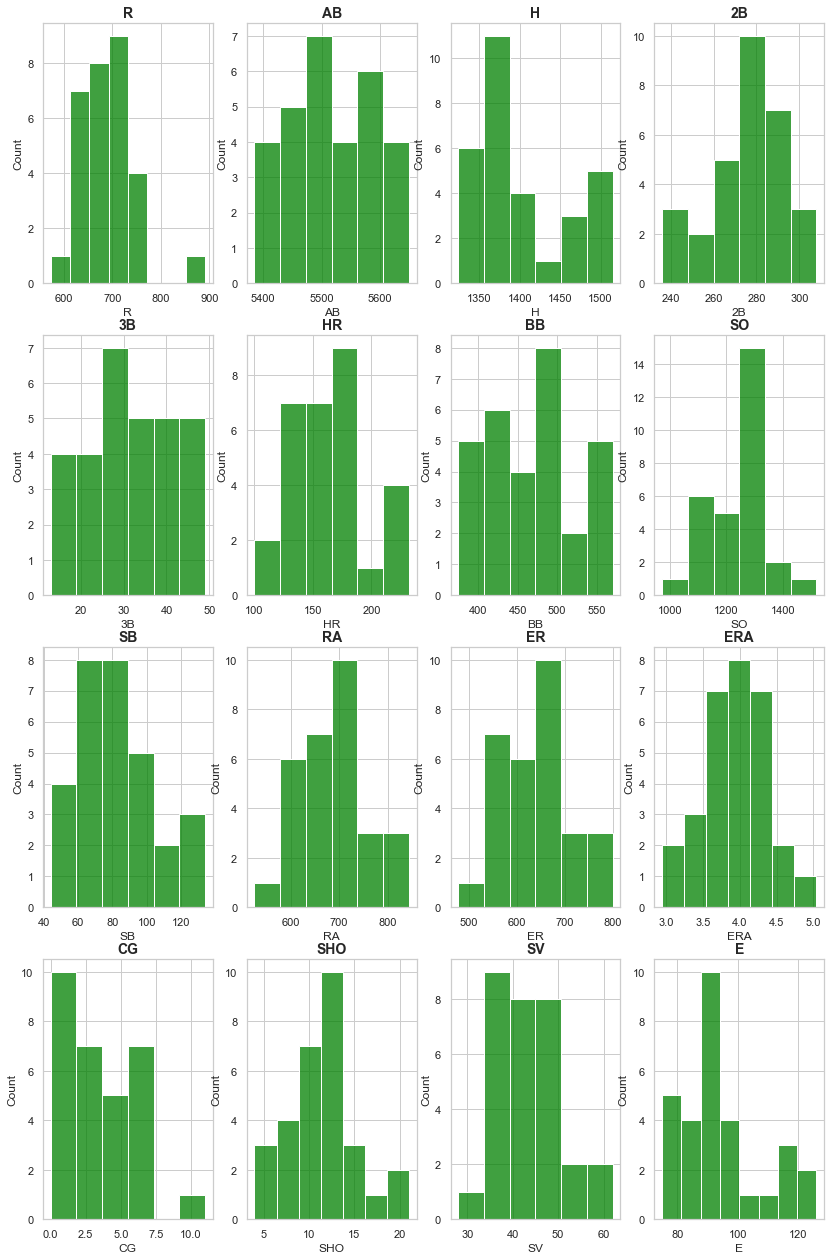

In [22]:
col=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA', 'CG', 'SHO', 'SV', 'E']
a = 4  # number of rows
b = 4 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),fontsize=14,fontweight='bold')
    plt.xlabel(i)
    sns.histplot(df[i],color='green')
    c = c + 1

plt.show()

Here we can see the distribution of different features.

### Lets see with probability density function of Features

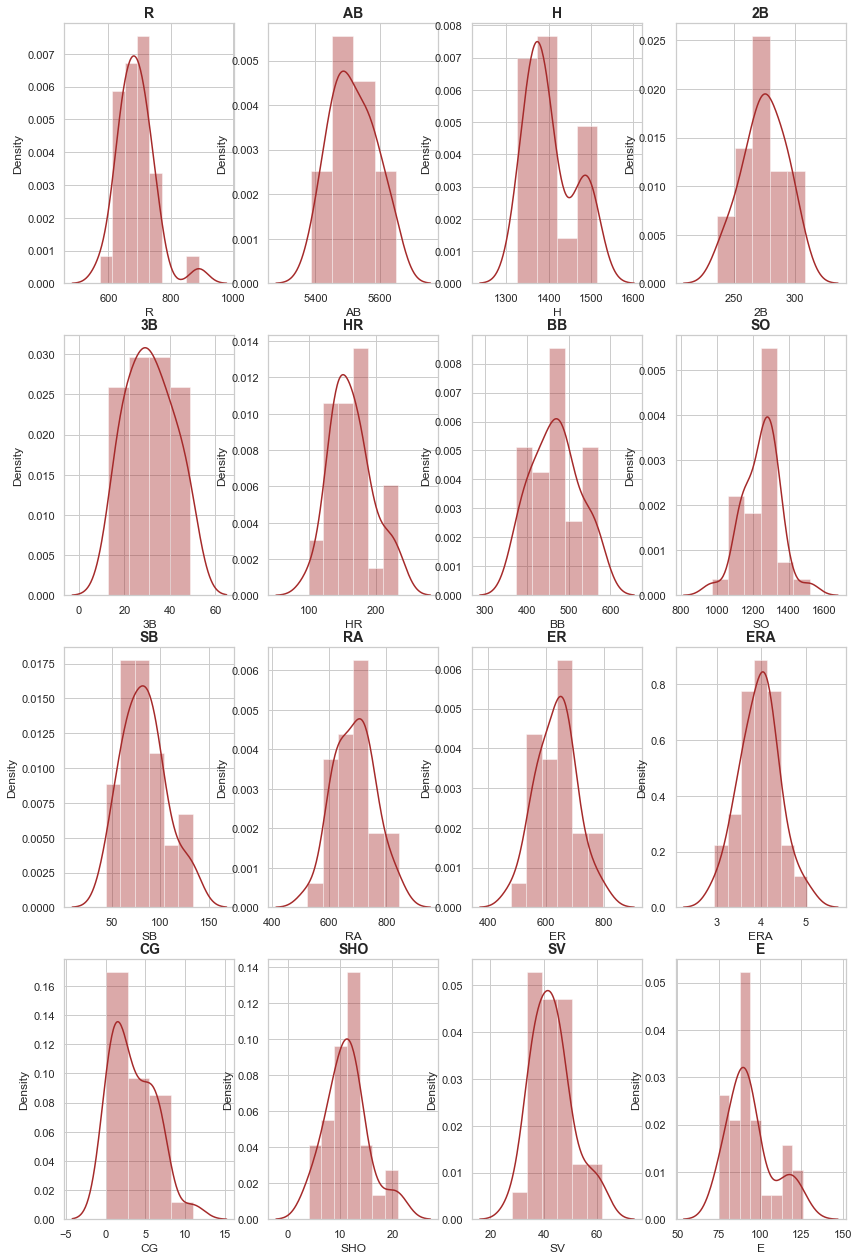

In [23]:
a = 4  # number of rows
b = 4 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),fontsize=14,fontweight='bold')
    plt.xlabel(i)
    sns.distplot(df[i],kde=True,color='brown')
    c = c + 1

plt.show()

Here we can see the probablity density of differnt features and here in some coluns data is skewed which we can remove later.

### Boxplots

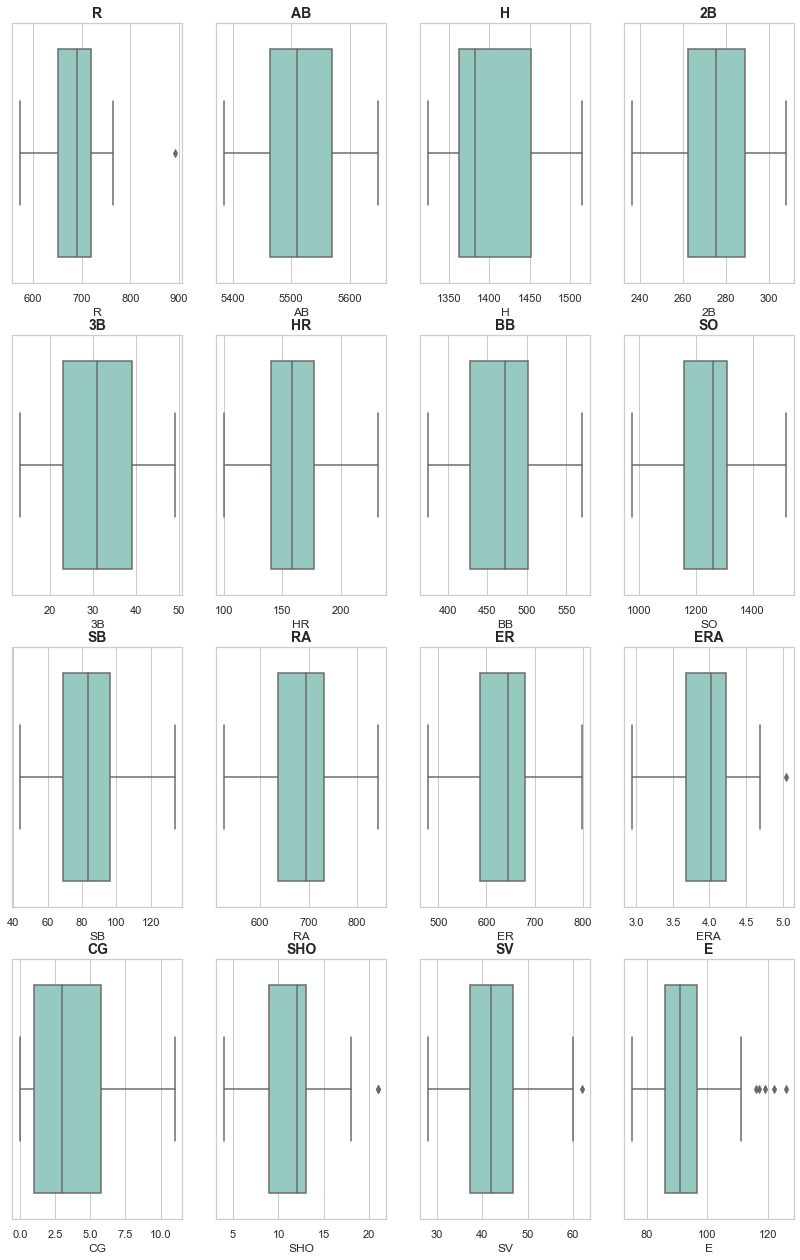

In [24]:
a = 4  # number of rows
b = 4 # number of columns
c = 1  # initialize plot counter


fig = plt.figure(figsize=(14,22))

for i in col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),fontsize=14,fontweight='bold')
    plt.xlabel(i)
    sns.boxplot(df[i],palette="Set3")
    c = c + 1

plt.show()

A box-plot is a very useful and standardized way of displaying the distribution of data. Here it shows, there are some outliers present in some columns (Error,SV,SHO,R,ERA)

### Lets see this with scatterplot

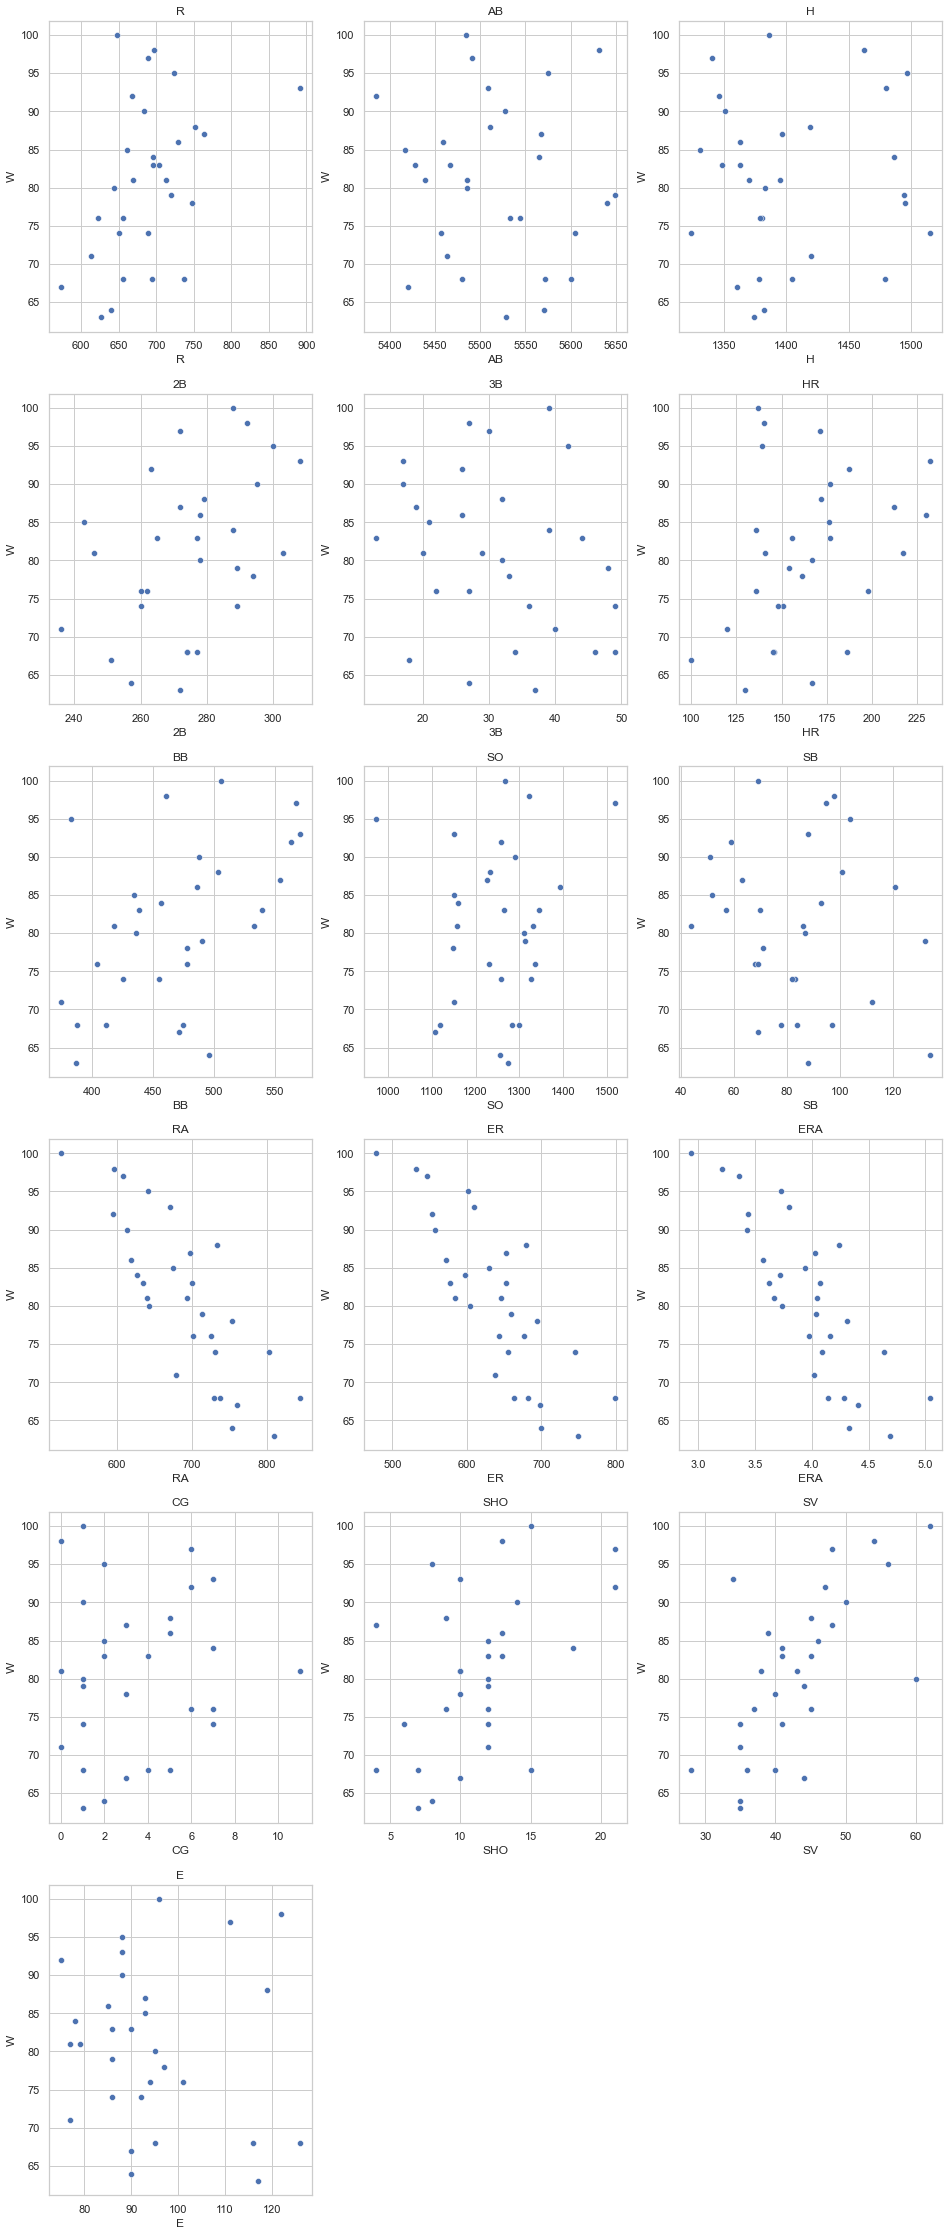

In [25]:
a =  6 # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter


fig = plt.figure(figsize=(16,40))

for i in col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.scatterplot(x=i,y='W',data=df)
    c = c + 1

plt.show()

### Inference

As we can see from above scatter plots :

1- Columns names(runs,homeruns,walks,Strikeouts, Stolen Bases,SV) have a positive increasing relation with the win outcome

2- While some columns like Error, Earned Runs, Earned Run Average (ERA), Shutouts have the decrease impact on the win outcome

3- Some columns like(AtBAT,HIT,2B,3B,SB,CG) - No specific pattern, as the data is very much spreaded,

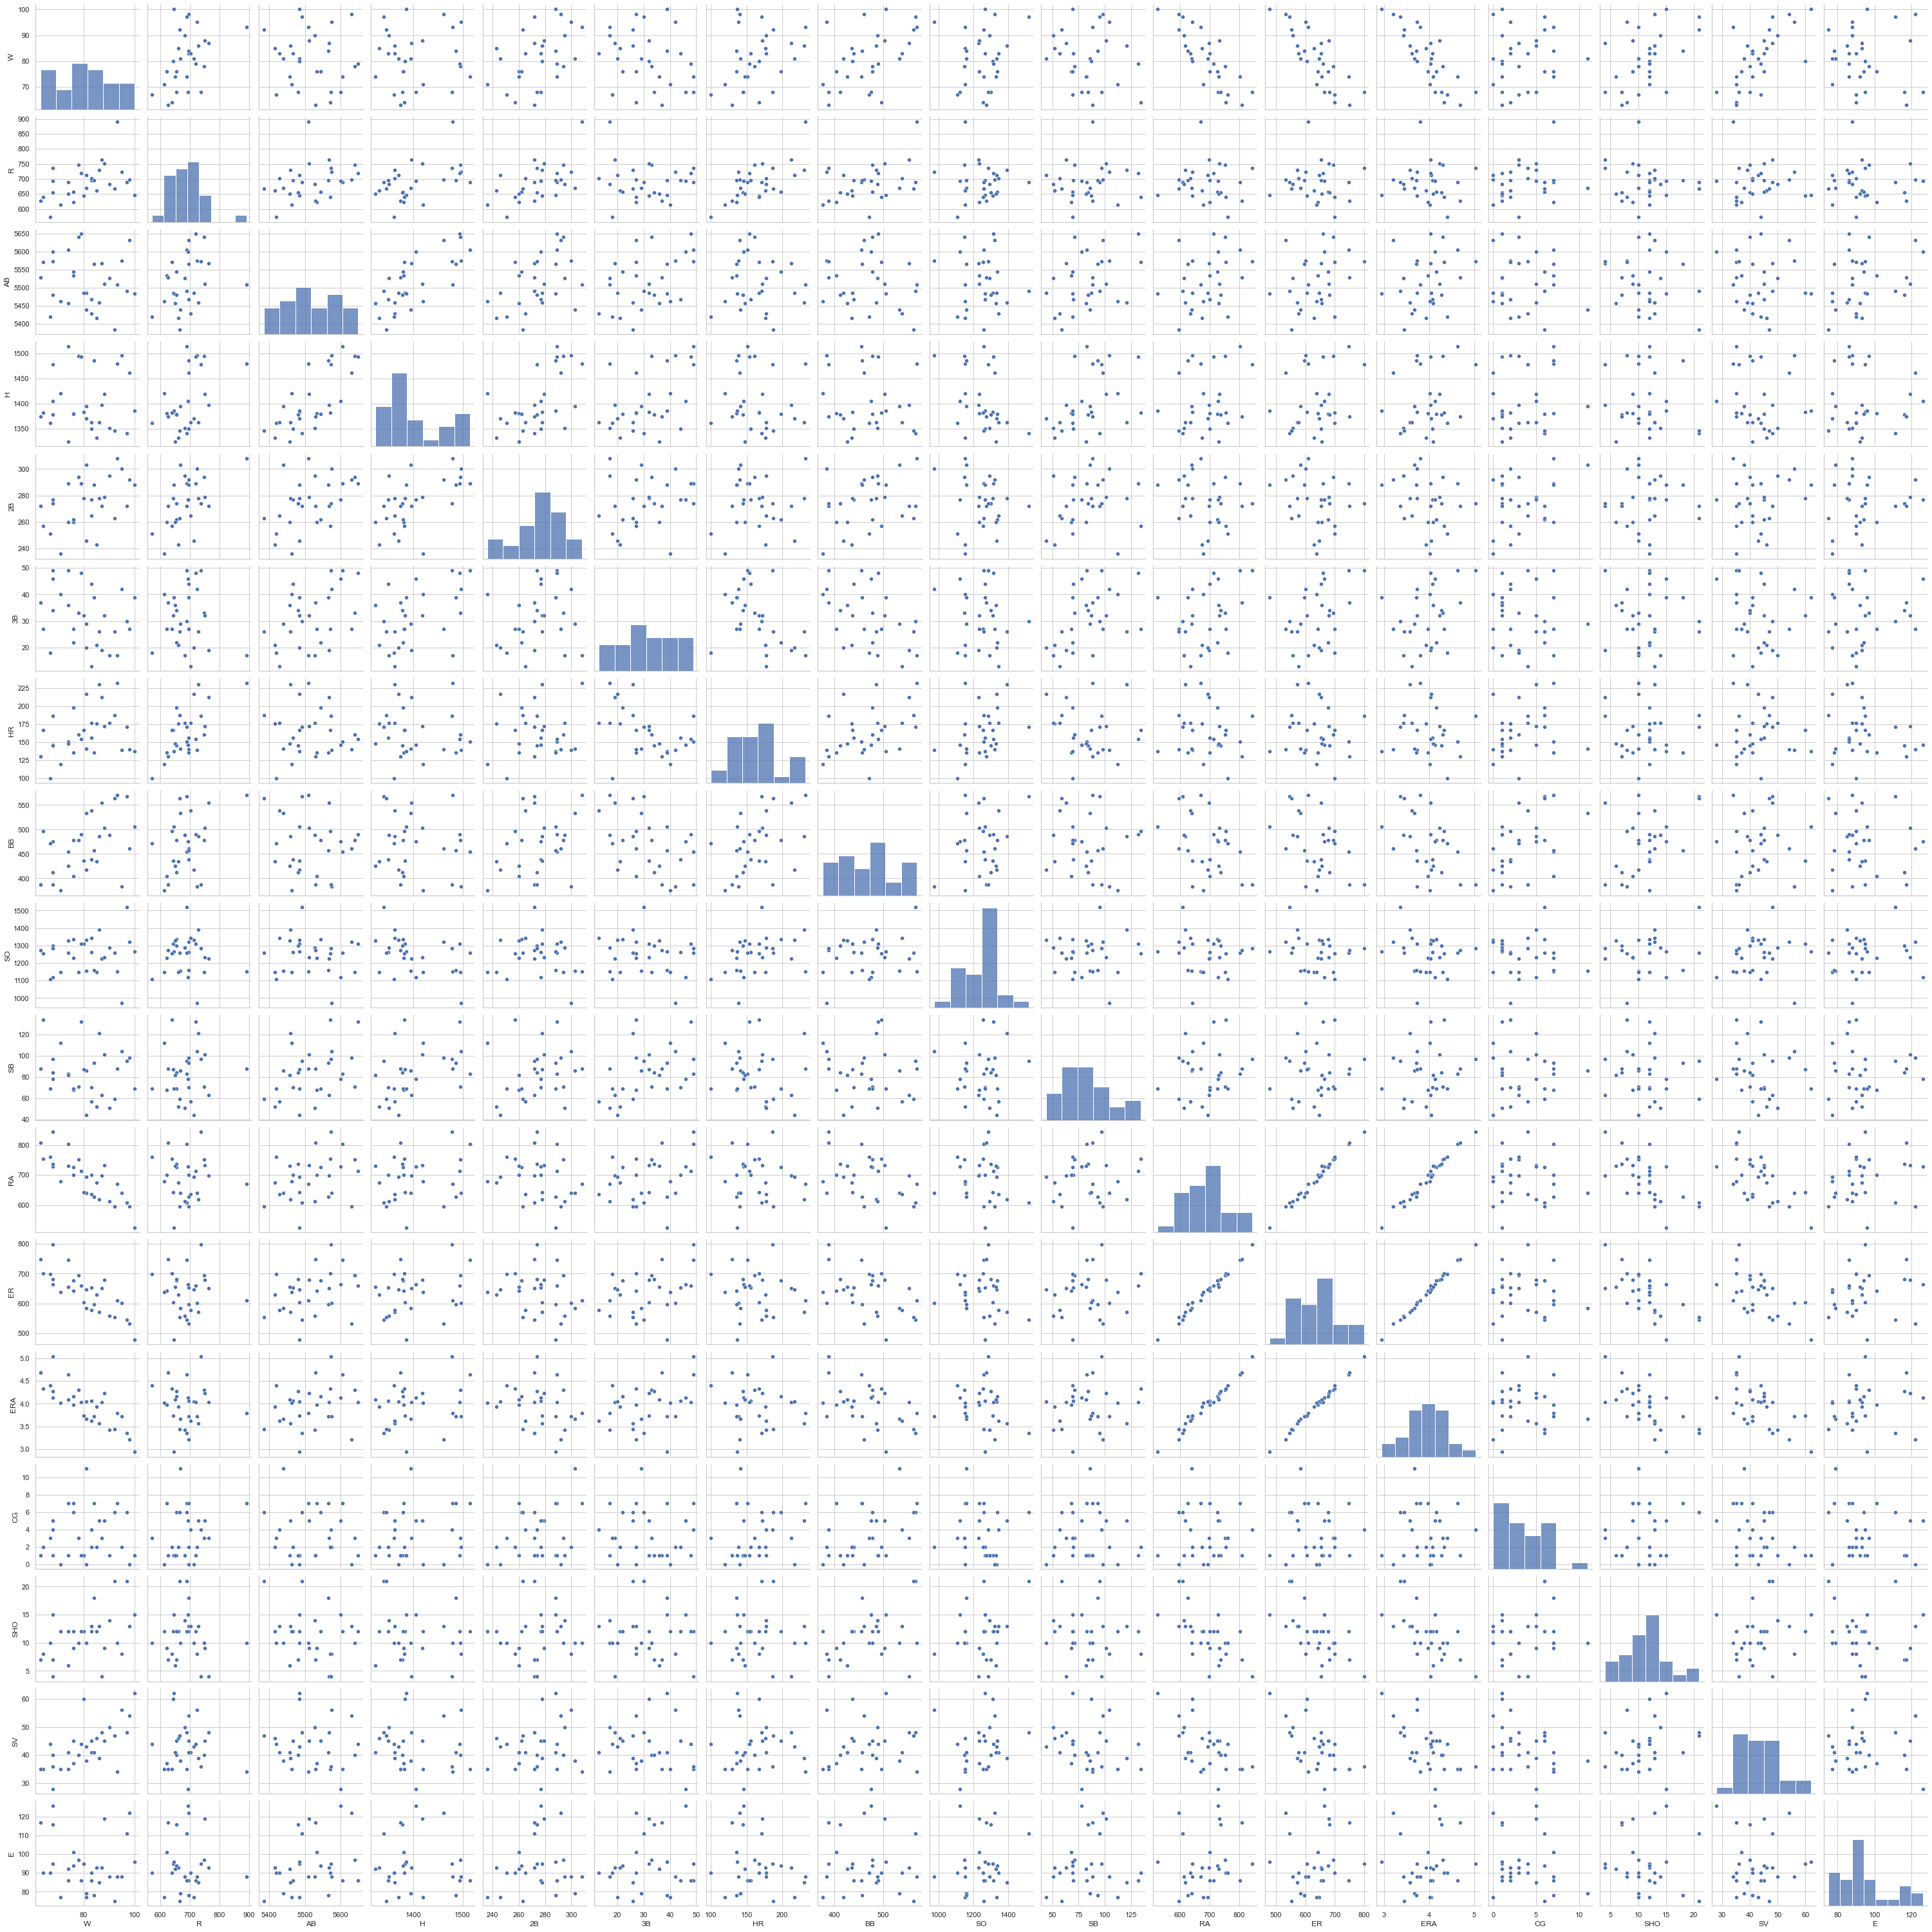

In [27]:
sns.pairplot(df)

## Feature Engineering & Selection

### Checking the missing values

In [28]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No missing values present in the dataset

## Removing the features which are highly correlated

In [29]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation(df, 0.9)
len(set(corr_features))

2

In [34]:
corr_features

{'ER', 'ERA'}

In [35]:
df=df.drop(corr_features,axis=1)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86


from the dataset 2 columns are removed as they are highly correlated with the other columns

### Removing Outliers

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [37]:
new_df.shape

(29, 15)

Hence, after removing outliers we have now 29 rows and 15 features

In [38]:
df.shape

(30, 15)

The total number of rows at staring was 30 and features were 15

In [39]:
df=new_df

### Removing Skewness

In [40]:
x=df.drop(['W'],axis=1)
y=df[['W']]

In [41]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [42]:
#Now lets remove the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.sqrt(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.log(x[index])

In [43]:
x.skew()

R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.714966
dtype: float64

all skewness is from the columns were removed except for Hits and Error there is some which canbe neglected.

In [44]:
x.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values are present

In [45]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,724,5575,38.691084,300,42,139,383,973,104,641,1.414214,2.828427,7.483315,9.380832
1,696,5467,36.728735,277,44,156,439,1264,70,700,1.414214,3.464102,6.708204,9.273618
2,669,5439,37.349699,303,29,141,533,1157,86,640,3.316625,3.162278,6.164414,8.888194
3,622,5533,37.161808,260,27,136,404,1231,68,701,2.645751,3.000000,6.082763,10.049876
4,689,5605,38.923001,289,49,151,455,1259,83,803,2.645751,3.464102,5.916080,9.273618


After removing skewness ,lets see with graph

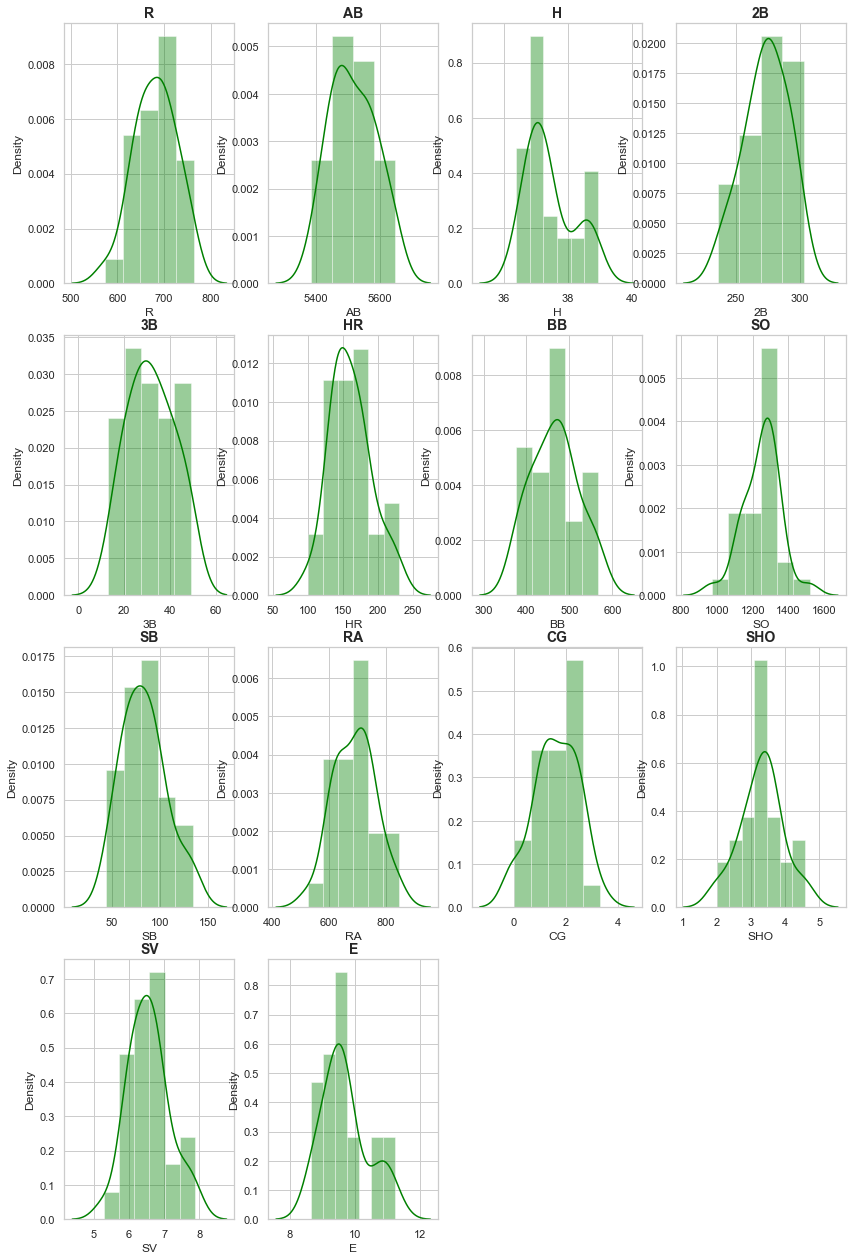

In [46]:
col=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'CG', 'SHO', 'SV', 'E']
a = 4  # number of rows
b = 4 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),fontsize=14,fontweight='bold')
    plt.xlabel(i)
    sns.distplot(x[i],kde=True,color='green')
    c = c + 1

plt.show()

Hence we can see that all data in columns are normally distributed

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(x)

x=pd.DataFrame(X,columns=x.columns)
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0.959398,0.830084,1.731088,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.253549,-0.777436,1.602631,-0.454325
1,0.331147,-0.702831,-0.944305,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.253549,0.247475,0.255621,-0.607619
2,-0.274666,-1.100253,-0.097707,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.020463,-0.239162,-0.689393,-1.158698
3,-1.329231,0.233951,-0.353870,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.218547,-0.500806,-0.831290,0.502274
4,0.174084,1.255894,2.047274,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.218547,0.247475,-1.120956,-0.607619


### Finding best_random_state

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [50]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)

    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2 score is ",maxAccu,"on Random_state ",maxRS)

Best r2 score is  0.8666542293729731 on Random_state  42


In [51]:
x.shape

(29, 14)

In [52]:
y.shape

(29, 1)

### Splitting the data for training & testing

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 14)
(9, 14)
(20, 1)
(9, 1)


## Model evaluation

In [54]:
LR=LinearRegression()
sv=SVR()
rf=RandomForestRegressor(n_estimators=100)
ada=AdaBoostRegressor(n_estimators=50)
knn=KNeighborsRegressor(n_neighbors=10)
dtr=DecisionTreeRegressor()
ls=Lasso(alpha=1.0)
rd=Ridge(alpha=1.0)

In [55]:
model=[LR,sv,rf,ada,knn,dtr,ls,rd]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("The Mean squared error value of ",m ,"is. ")
    print("Residual sum of squares (MSE): " , mean_squared_error(y_test,predm))
    print()
    print("The r2_score value of ",m ,"is. ")
    print("R2-score of : %.2f" % r2_score(y_test,predm))
    print()
    print("Now check with Cross validation\n")
    
    score=cross_val_score(m,x,y,cv=3)
    print("The score after cross_validation : ",score)
    print("The Mean score after cross_validation :  %.2f " % score.mean())
    print('\n')

The Mean squared error value of  LinearRegression() is. 
Residual sum of squares (MSE):  13.071178009612273

The r2_score value of  LinearRegression() is. 
R2-score of : 0.87

Now check with Cross validation

The score after cross_validation :  [-0.35745094  0.60832709  0.31430638]
The Mean score after cross_validation :  0.19 


The Mean squared error value of  SVR() is. 
Residual sum of squares (MSE):  92.0004886161789

The r2_score value of  SVR() is. 
R2-score of : 0.06

Now check with Cross validation

The score after cross_validation :  [-0.24132975  0.02325606 -0.39075861]
The Mean score after cross_validation :  -0.20 


The Mean squared error value of  RandomForestRegressor() is. 
Residual sum of squares (MSE):  59.40762222222223

The r2_score value of  RandomForestRegressor() is. 
R2-score of : 0.39

Now check with Cross validation

The score after cross_validation :  [-1.71592871  0.53581215  0.58426333]
The Mean score after cross_validation :  -0.20 


The Mean squared erro

Minimum difference in r2 score and cross validation score is for Lasso , so this is our best model as it's r2_score is 0.75 and after cross-validation it's score is : 0.63.

### Hyper parameter tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [{'alpha':np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0]),
              'selection':['cyclic', 'random'],
              'fit_intercept':[True,False],
              'normalize':[True,False] 
                               }]

    
model = Lasso()
rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_estimator_)
print(rand_search.best_score_)

Lasso(alpha=0.5, normalize=True)
0.37023131026689693


In [57]:
ls=Lasso(alpha=0.1, normalize=True)
ls.fit(x_train,y_train)
predm=ls.predict(x_test)
print("The Mean squared error value of ",ls ,"is. ")
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test,predm))
print()
print("The r2_score value of ",m ,"is. ")
print("R2-score of : %.2f" % r2_score(y_test,predm))
print()
print("Now check with Cross validation\n")
    
score=cross_val_score(ls,x,y,cv=5)
print("The score after cross_validation : ",score)
print("The Mean score after cross_validation : ",score.mean())

The Mean squared error value of  Lasso(alpha=0.1, normalize=True) is. 
Residual sum of squares (MSE): 19.04

The r2_score value of  Ridge() is. 
R2-score of : 0.81

Now check with Cross validation

The score after cross_validation :  [ 0.69964068 -1.08667251  0.76209217  0.89028781  0.90100965]
The Mean score after cross_validation :  0.4332715608117147


#### The final model has a R2 score of 0.81 and a Cross-validation score of 0.44

## Saving the model

In [58]:
#saving the model
model=joblib.dump(ls,'BbLasso.obj')

### Conclusion :

In [59]:
loaded_model= joblib.load('BbLasso.obj')
result=loaded_model.score(x_test,y_test)
print(result)

0.8057250973605801


In [60]:
conclusion= pd.DataFrame([ls.predict(x_test)[:10]],index=['Predicted','Original'])

In [61]:
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,72.894245,87.790372,76.69429,68.635035,79.115305,80.343436,73.016484,90.763381,79.562411
Original,72.894245,87.790372,76.69429,68.635035,79.115305,80.343436,73.016484,90.763381,79.562411
